# How to Play

In this notebook we will explain the basic concepts of the game, and how to play 😃.

Press the ⏩️ above to run all cells.

In [1]:
from levels.level_4 import Level4, circ, arc

**This is our initial quantum circuit.**

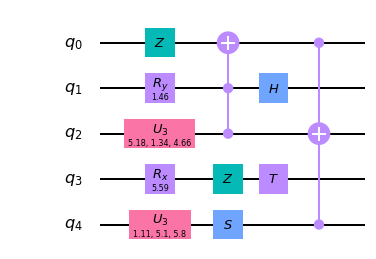

In [2]:
circ.draw(output='mpl')

**Which actually looks like this in machine level instructions:**

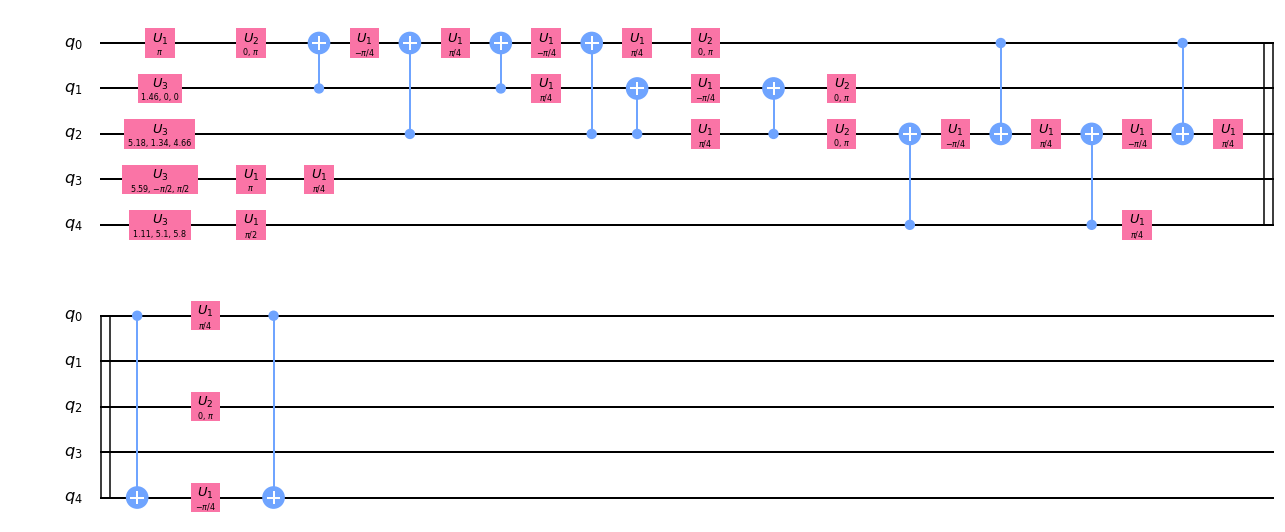

In [3]:
from qiskit.transpiler.passes import Unroller
from qiskit.transpiler import PassManager
pass_ = Unroller(['id', 'u1', 'u2', 'u3', 'cx'])
pm = PassManager(pass_)
circuit = pm.run(circ)

circuit.draw(output='mpl')

**We would like to run it on this architecture, but not all the two-qubit gates are allowed in the circuit are allowed.**

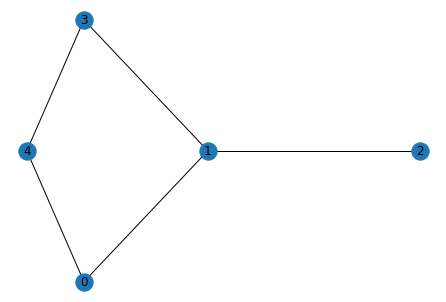

In [4]:
import networkx as nx
arc_graph = nx.Graph()
arc_graph.add_edges_from(arc)
nx.draw_spectral(arc_graph, with_labels=True)

**In order to be able to run the circuit on the architecture, we must include swap gates.**

**This is what the game looks like:**

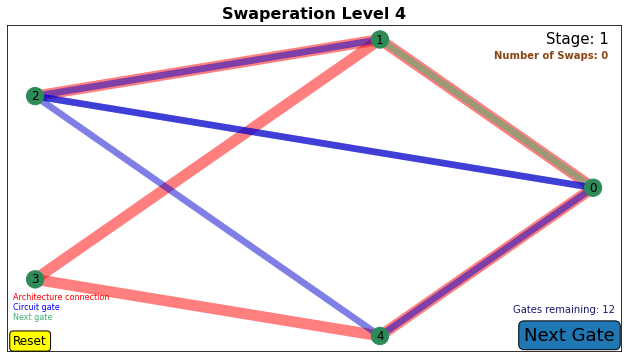

In [5]:
Level4()

**The red lines on the graph correspond to the connectivity of the underlying architecture.**

**The blue lines correspond to the two-qubits gates in the given circuit.**

You can play the game on the interactive graph below.

## Stage 1

You can swap nodes by clicking on them -- when two nodes are selected they will swap places, corresponding to a relabelling of the qubit labels on the quantum circuit. This always comes at no cost, as we have freedom to choose how each logical qubit of the circuit gets mapped onto the physical qubits of the architecture. As this just corresponds to a relabelling, any two nodes may be swapped.

When you are happy with the initial layout click: *Next Stage* to advance to Stage 2.

## Stage 2

In this stage the two-qubit gates in the circuit will be looped over. The current gate will be shown in green, future gates in blue, and completed gates will disappear.

If there is a gate that is not currently on the architecture, you can again swap nodes to allow this gate to be implemented. This comes at the cost of a SWAP gate (comprised of 3 CNOT gates). Now you can only swap nodes which are connected by an architecture edge.

When all the gates have been looped over, the game is finished. You have successfully found a way of implementing the original circuit on this architecture! The output of the game is the new circuit and the initial logical - physical qubit mapping.

**Your score is the number of SWAP gates you used!**

## <span style="color:blue">Play the Game!</span>

In [6]:
%matplotlib notebook

<IPython.core.display.Javascript object>


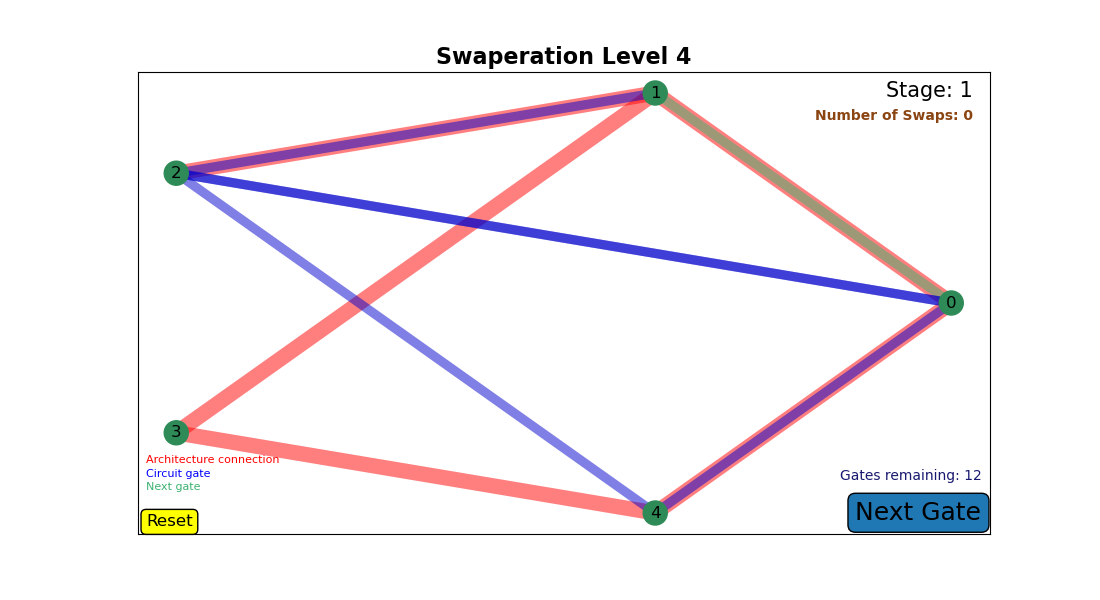

In [7]:
g = Level4()

#### Run the below cell again after playing the game to see the original and final circuit mapping

In [9]:
print('Initial (Logical --> Physical) Mapping')
for i in range(g.num_qubits):
    print(i, '-->', g.initial_mapping(i))
print('\n')
print("Initial Circuit")
print(g.initial_circ.draw())
print("Final Circuit")
print(g.final_circ.draw())


Initial (Logical --> Physical) Mapping
0 --> 0
1 --> 1
2 --> 2
3 --> 3
4 --> 4


Initial Circuit
              ┌────────┐         ┌──────────┐   ┌───┐    ┌───────────┐┌───┐»
q_0: ─────────┤ U1(pi) ├─────────┤ U2(0,pi) ├───┤ X ├────┤ U1(-pi/4) ├┤ X ├»
          ┌───┴────────┴───┐     └──────────┘   └─┬─┘    └───────────┘└─┬─┘»
q_1: ─────┤ U3(1.4571,0,0) ├──────────────────────■─────────────────────┼──»
     ┌────┴────────────────┴────┐                                       │  »
q_2: ┤ U3(5.1789,1.3431,4.6588) ├───────────────────────────────────────■──»
     └┬───────────────────────┬─┘ ┌────────┐ ┌──────────┐                  »
q_3: ─┤ U3(5.5914,-pi/2,pi/2) ├───┤ U1(pi) ├─┤ U1(pi/4) ├──────────────────»
     ┌┴───────────────────────┴─┐┌┴────────┴┐└──────────┘                  »
q_4: ┤ U3(1.1052,5.1025,5.8015) ├┤ U1(pi/2) ├──────────────────────────────»
     └──────────────────────────┘└──────────┘                              »
«     ┌──────────┐┌───┐┌───────────┐┌───┐┌──────────┐ ┌─